# Matrix Factorization using Surprise Library


In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from surprise import Dataset
from surprise import Reader
from surprise import SVDpp
from surprise import accuracy
from surprise.model_selection import KFold
from surprise.model_selection import GridSearchCV


In [117]:
# Creation of the dataframe. Column names are irrelevant.
Y_train = np.loadtxt('./data/train.txt').astype(int)
train = pd.DataFrame(Y_train, columns=['userID', 'movieID', 'rating'])
Y_test = np.loadtxt('./data/test.txt').astype(int)
test = pd.DataFrame(Y_test, columns=['userID', 'movieID', 'rating'])
dataset = np.loadtxt('./data/data.txt').astype(int)
dataset = pd.DataFrame(dataset, columns=['userID', 'movieID', 'rating'])

In [119]:
reader = Reader(rating_scale=(1, 5))
trainset = Dataset.load_from_df(train[['userID', 'movieID', 'rating']], reader)
test_data = Dataset.load_from_df(test[['userID', 'movieID', 'rating']], reader)
dataset = Dataset.load_from_df(dataset[['userID', 'movieID', 'rating']], reader)


trainset = trainset.build_full_trainset()
fulldata = data.build_full_trainset()

In [109]:
regs = [10**-3, 10**-2, 10**-1, 1]
etas = [0.01, 0.03, 0.05]
E_ins = []
E_outs = []
ep = 20
# Use to compute Eout
for reg in regs:
        E_outs_for_lambda = []

        for eta in etas:
            print("Training model with epoch = %d, eta = %s, reg = %s"%(ep, eta, reg))
            algo = SVDpp(n_epochs = ep, lr_all = eta, reg_all = reg)
            algo.fit(trainset)
            predictions = []
            for i in range(len(test)):
                uid, mid, rating = test.iloc[i, :]
                predictions.append(algo.predict(uid, mid, rating).est)
            E_outs_for_lambda.append(np.sqrt(np.mean((predictions-test.rating)**2)))

        E_outs.append(E_outs_for_lambda)


# Plot values of E_out across k for each value of lambda
for i in range(len(regs)):
    plt.plot(etas, E_outs[i], label='$E_{out}, \lambda=$'+str(regs[i]))
plt.title('$E_{out}$ vs. K')
plt.xlabel('eta')
plt.ylabel('Error')
plt.legend()	
plt.savefig('SVD_eout_20.png')		


Training model with epoch = 20, eta = 0.01, reg = 0.001
Training model with epoch = 20, eta = 0.03, reg = 0.001
Training model with epoch = 20, eta = 0.05, reg = 0.001
Training model with epoch = 20, eta = 0.01, reg = 0.01
Training model with epoch = 20, eta = 0.03, reg = 0.01
Training model with epoch = 20, eta = 0.05, reg = 0.01
Training model with epoch = 20, eta = 0.01, reg = 0.1
Training model with epoch = 20, eta = 0.03, reg = 0.1
Training model with epoch = 20, eta = 0.05, reg = 0.1
Training model with epoch = 20, eta = 0.01, reg = 1
Training model with epoch = 20, eta = 0.03, reg = 1
Training model with epoch = 20, eta = 0.05, reg = 1


IndexError: list index out of range

Training model with epoch = 40, eta = 0.01, reg = 0.001
Training model with epoch = 40, eta = 0.03, reg = 0.001
Training model with epoch = 40, eta = 0.05, reg = 0.001
Training model with epoch = 40, eta = 0.01, reg = 0.01
Training model with epoch = 40, eta = 0.03, reg = 0.01
Training model with epoch = 40, eta = 0.05, reg = 0.01
Training model with epoch = 40, eta = 0.01, reg = 0.1
Training model with epoch = 40, eta = 0.03, reg = 0.1
Training model with epoch = 40, eta = 0.05, reg = 0.1


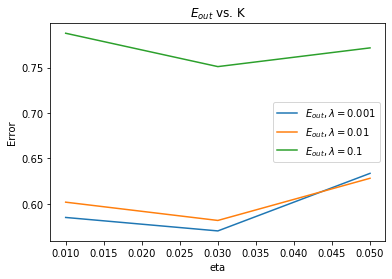

In [111]:
regs = [10**-3, 10**-2, 10**-1]
etas = [0.01, 0.03, 0.05]
E_ins = []
E_outs = []
ep = 40
# Use to compute Eout
for reg in regs:
        E_outs_for_lambda = []

        for eta in etas:
            print("Training model with epoch = %d, eta = %s, reg = %s"%(ep, eta, reg))
            algo = SVDpp(n_epochs = ep, lr_all = eta, reg_all = reg)
            algo.fit(trainset)
            predictions = []
            for i in range(len(test)):
                uid, mid, rating = test.iloc[i, :]
                predictions.append(algo.predict(uid, mid, rating).est)
            E_outs_for_lambda.append(np.sqrt(np.mean((predictions-test.rating)**2)))

        E_outs.append(E_outs_for_lambda)


# Plot values of E_out across eta for each value of lambda
for i in range(len(regs)):
    plt.plot(etas, E_outs[i], label='$E_{out}, \lambda=$'+str(regs[i]))
plt.title('$E_{out}$ vs. K')
plt.xlabel('eta')
plt.ylabel('Error')
plt.legend()	
plt.savefig('SVD_eout_40.png')		


In [112]:
algo = SVDpp(n_epochs = 40, lr_all = 0.03, reg_all = 0.001)
algo.fit(fulldata)

In [114]:
algo.qi.shape

(1682, 20)

In [115]:
np.savetxt("./data/SVDpp.txt", algo.qi)